This notebook is used to analyze the matrix factorization results from Wan et. al's framework

In [1]:
from glob import glob
import os
from collections import defaultdict
from datetime import datetime, timedelta

import h5py
import numpy as np
import pandas as pd
import matplotlib._color_data as mcd
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib as mpl
from matplotlib import gridspec
from scipy.stats import mannwhitneyu
import seaborn as sns 

mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
plt.style.use('seaborn-white')


In [2]:
DATA_DIR = '/mnt/ceph/users/kchen/jupyter_notebooks/sk/fp_534/cos534-final-project/marketBias/result_all'

In [3]:
def get_rating_perf(protect_item, protect_user, protect_user_item):
    query_files = os.path.join(DATA_DIR, '*_{0}_{1}_{2}_rating_results.csv'.format(
        protect_item, protect_user, protect_user_item))
    
    hp_df = {}
    hp = []
    mse = []
    
    for fp in glob(query_files):
        lbda = os.path.basename(fp).split('MF')[1].split('_')[4]
        C = os.path.basename(fp).split('MF')[1].split('_')[1]
        params = (lbda, C)
        
        df = pd.read_csv(fp)
        hp_df[params] = df
        hp.append(params)
        mse.append(df[df['Unnamed: 0'] == 'validation']['MSE'].values[0])
    ix = np.argmin(mse)
    print('Rating performance')
    print('Parameters: lambda = {0}, corr_loss = {1}'.format(
        *hp[ix]))
    return hp_df[hp[ix]]

In [4]:
def get_ranking_perf(protect_item, protect_user, protect_user_item):
    query_files = os.path.join(DATA_DIR, '*_{0}_{1}_{2}_ranking_results.csv'.format(
        protect_item, protect_user, protect_user_item))
    
    hp_df = {}
    hp = []
    ndcg = []
    
    for fp in glob(query_files):
        lbda = os.path.basename(fp).split('MF')[1].split('_')[4]
        C = os.path.basename(fp).split('MF')[1].split('_')[1]
        params = (lbda, C)
        
        df = pd.read_csv(fp)
        hp_df[params] = df
        hp.append(params)
        ndcg.append(df[df['Unnamed: 0'] == 'validation']['NDCG'].values[0])
    ix = np.argmin(ndcg)
    print('Ranking performance')
    print('Parameters: lambda = {0}, corr_loss = {1}'.format(
        *hp[ix]))
    return hp_df[hp[ix]]

Display the performance metrics for the best-performing model (based on validation accuracy).

Note that `protect_item` refers to movies here, we just keep the language the same as what was used in the framework. 

### Standard MF

In [5]:
protect_item = 0
protect_user = 0
protect_user_item = 0
display(get_rating_perf(protect_item, protect_user, protect_user_item))
display(get_ranking_perf(protect_item, protect_user, protect_user_item))

Rating performance
Parameters: lambda = 0.1, corr_loss = 0


,Unnamed: 0,MSE,MAE,F-stat,p-value
0,validation,0.721758,0.664944,8.557137,4.106509e-08
1,test,0.796458,0.700816,9.369875,6.120114e-09


Ranking performance
Parameters: lambda = 10, corr_loss = 0


,Unnamed: 0,NDCG,AUC,KL
0,validation,0.103081,0.632573,0.064861
1,test,0.101569,0.623268,0.074229


### MF(corr.error)

In [7]:
protect_item = 1
protect_user = 0
protect_user_item = 0
display(get_rating_perf(protect_item, protect_user, protect_user_item))
display(get_ranking_perf(protect_item, protect_user, protect_user_item))

Rating performance
Parameters: lambda = 0.1, corr_loss = 0.5


,Unnamed: 0,MSE,MAE,F-stat,p-value
0,validation,0.863468,0.734961,11.780768,2.069760e-11
1,test,0.943910,0.770629,21.041331,4.300510e-21


Ranking performance
Parameters: lambda = 0.1, corr_loss = 10.0


,Unnamed: 0,NDCG,AUC,KL
0,validation,0.100791,0.455910,0.004348
1,test,0.099594,0.434933,0.012201


In [8]:
protect_item = 0
protect_user = 1
protect_user_item = 0
display(get_rating_perf(protect_item, protect_user, protect_user_item))
display(get_ranking_perf(protect_item, protect_user, protect_user_item))

Rating performance
Parameters: lambda = 0.1, corr_loss = 0.5


,Unnamed: 0,MSE,MAE,F-stat,p-value
0,validation,0.913464,0.757270,19.455213,2.043896e-19
1,test,0.987658,0.791637,37.212383,2.891838e-38


Ranking performance
Parameters: lambda = 10, corr_loss = 5.0


,Unnamed: 0,NDCG,AUC,KL
0,validation,0.099952,0.549000,0.033831
1,test,0.099887,0.555115,0.050626


In [9]:
protect_item = 0
protect_user = 0
protect_user_item = 1
display(get_rating_perf(protect_item, protect_user, protect_user_item))
display(get_ranking_perf(protect_item, protect_user, protect_user_item))

Rating performance
Parameters: lambda = 0.1, corr_loss = 10.0


,Unnamed: 0,MSE,MAE,F-stat,p-value
0,validation,0.719717,0.664685,6.108318,0.000012
1,test,0.794757,0.700378,6.769610,0.000003


Ranking performance
Parameters: lambda = 10, corr_loss = 1.0


,Unnamed: 0,NDCG,AUC,KL
0,validation,0.103106,0.633806,0.061919
1,test,0.101709,0.625525,0.088172


In [10]:
protect_item = 1
protect_user = 1
protect_user_item = 0
display(get_rating_perf(protect_item, protect_user, protect_user_item))
display(get_ranking_perf(protect_item, protect_user, protect_user_item))

Rating performance
Parameters: lambda = 0.1, corr_loss = 0.5


,Unnamed: 0,MSE,MAE,F-stat,p-value
0,validation,0.927266,0.762015,14.243179,5.815740e-14
1,test,1.009244,0.799807,30.942462,1.384173e-31


Ranking performance
Parameters: lambda = 10, corr_loss = 5.0


,Unnamed: 0,NDCG,AUC,KL
0,validation,0.098138,0.475854,0.023801
1,test,0.097499,0.469434,0.036402


In [6]:
protect_item = 1
protect_user = 1
protect_user_item = 1
display(get_rating_perf(protect_item, protect_user, protect_user_item))
display(get_ranking_perf(protect_item, protect_user, protect_user_item))

Rating performance
Parameters: lambda = 0.1, corr_loss = 0.5


,Unnamed: 0,MSE,MAE,F-stat,p-value
0,validation,0.946755,0.769718,15.172153,6.266685e-15
1,test,1.026092,0.807680,29.249012,8.741459e-30


Ranking performance
Parameters: lambda = 10, corr_loss = 5.0


,Unnamed: 0,NDCG,AUC,KL
0,validation,0.098575,0.480473,0.041988
1,test,0.097800,0.474950,0.058190


## Get errors for each test sample

In [13]:
TESTDIR = '/mnt/ceph/users/kchen/jupyter_notebooks/sk/fp_534/cos534-final-project/marketBias/test_pred'

In [67]:
segments = [('M', 'M'), ('M', 'F'), ('M', 'MF'),
            ('F', 'F'), ('F', 'M'), ('F', 'MF')]

performance = []

for fp in glob(os.path.join(TESTDIR, '*_rating_test.csv')):
    fn = os.path.basename(fp)
    C = fn.split('MF')[1].split('_')[1]
    lbda = fn.split('MF')[1].split('_')[4]
    m, u, mu = fn.split('MF')[1].split('_')[6:9]
    if C == '0':
            model = 'standard MF'
    else: 
        model = '({0}, {1}, {2})'.format(m, u, mu)
    test_df = pd.read_csv(fp)
    for (u_attr, m_attr) in segments:
        subset_df = test_df[(test_df['user_attr'] == u_attr) &
                            (test_df['model_attr'] == m_attr)]
        remaining_df = test_df[~((test_df['user_attr'] == u_attr) &
                                 (test_df['model_attr'] == m_attr))]
        in_mse = np.mean(subset_df['error'].values**2)
        out_mse = np.mean(remaining_df['error'].values**2)
        performance.append({
            'protect_movie': m, 
            'protect_user': u,
            'protect_user_movie': mu,
            'model': model,
            'MSE': in_mse,
            'MSE(out) - MSE(in)': out_mse - in_mse,
            'segment': 'user = {0}, movie = {1}'.format(u_attr, m_attr),
            'user_attr': u_attr,
            'movie_attr': m_attr
        })

In [68]:
segment_df = pd.DataFrame(performance)
segment_df['model'] = pd.Categorical(
    segment_df['model'], 
    categories=['standard MF', 
                '(0, 0, 1)',
                '(0, 1, 0)',
                '(1, 0, 0)',
                '(1, 1, 0)', 
                '(1, 1, 1)'],
    ordered=True)

In [ ]:
plt.figure(figsize=(6, 6))
sns.barplot(data=segment_df, x='model', y='MSE(out) - MSE(in)', hue='segment',
            palette={
                'user = M, movie = M': '#cf6119',
                'user = M, movie = F': '#ff5c33',
                'user = M, movie = MF': '#cf6119',
                'user = F, movie = F': '#42bda2',
                'user = F, movie = M': '#00ffdd',
                'user = F, movie = MF': '#42bda2'
            })

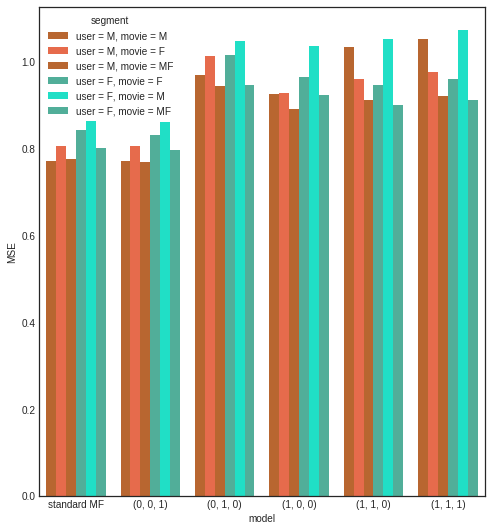

In [72]:
plt.figure(figsize=(8, 9))
sns.barplot(data=segment_df, x='model', y='MSE', hue='segment',
            palette={
                'user = M, movie = M': '#cf6119',
                'user = M, movie = F': '#ff5c33',
                'user = M, movie = MF': '#cf6119',
                'user = F, movie = F': '#42bda2',
                'user = F, movie = M': '#00ffdd',
                'user = F, movie = MF': '#42bda2'
            })